<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [140]:
# импорт библиотек
import pandas as pd
import psycopg2
import plotly.express as px
import plotly.graph_objects as go
import requests
from bs4 import BeautifulSoup

In [ ]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 


In [142]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [143]:
# текст запроса
query_3_1 = '''
    select 
        count(*)
    from vacancies
'''

In [144]:
# результат запроса
count_vacancies = pd.read_sql_query(query_3_1, connection)
count_vacancies

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\2627226083.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [145]:
# текст запроса
query_3_2 = '''
    select 
        count(*)
    from employers
'''

In [146]:
# результат запроса
count_employers = pd.read_sql_query(query_3_2, connection)
count_employers

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\2124197464.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [147]:
# текст запроса
query_3_3 = '''
    select 
        count(*)
    from areas
'''

In [148]:
# результат запроса
count_area = pd.read_sql_query(query_3_3, connection)
count_area

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\2037178432.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [149]:
# текст запроса
query_3_4 = '''
    select 
        count(*)
    from industries
'''

In [150]:
# результат запроса
count_industries = pd.read_sql_query(query_3_4, connection)
count_industries

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\2328395817.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,294


***

Выводы по предварительному анализу данных:

***

На основе проведенного предварительного анализа данных можно сделать следующие выводы:

Общие сведения:

1. Количество вакансий: 49197
2. Количество работодателей: 23,501
3. Количество регионов: 1,362
4. Количество сфер деятельности: 294

- Общее число вакансий(49197) указывает на высокий спрос рабочей силы, так же высокое число вакансий может указывать на дефицит специалистов с необходимыми навыками и квалификацией, и высокую конкуренцию среди работодателей, что может проявляться в предоставлении более привлекательных условий работы для соискателей (зарплата, бонусы, гибкий график) 

- Количество работодателей(23501) указывает на разнообразие компаний, размещающих вакансии, что может свидетельствовать о конкурентоспособности и разнообразии рынка труда

- Число вакансий(49197) превышает количество работодателей(23501), что указывает на то, что многие работодатели предлагают несколько позиций

- Широкий охват вакансий по регионам(1362) подтверждает, что рынок труда доступен для соискателей на довольно большой территории

- Разнообразие сфер деятельности(294) подтверждает высокий спрос на специалистов в различных областях, что открывает широкие возможности для соискателей.

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [151]:
# текст запроса
query_4_1 = '''
   SELECT
       a.name area,  --название региона
       COUNT(v.id) cnt --число вакансий
    FROM vacancies v
    JOIN areas a ON v.area_id = a.id
    GROUP BY 1
    ORDER BY 2 DESC -- сортировка по убыванию числа вакансий
'''

In [152]:
# результат запроса
cnt_area = pd.read_sql_query(query_4_1, connection)
cnt_area

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\2643501108.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [153]:
# текст запроса
query_4_2 = '''
   SELECT
       COUNT(*)
    FROM vacancies v
    WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL --фильтруем вакансии, где указано хотя бы одно из полей ЗП
'''

In [154]:
# результат запроса
salary_not_null = pd.read_sql_query(query_4_2, connection)
salary_not_null

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\1196159974.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [155]:
# текст запроса
query_4_3 = '''
    SELECT
        ROUND(AVG(v.salary_from)) avg_salary_from, --округленное среднее значение нижней границы ЗП
        ROUND(AVG(v.salary_to)) avg_salary_to --округленное среднее значение верхней границы ЗП
    FROM vacancies v
'''

In [156]:
# результат запроса
salary_avg = pd.read_sql_query(query_4_3, connection)
salary_avg

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\2814596301.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [157]:
# текст запроса
query_4_4 = '''
    SELECT
        schedule, --тип рабочего графика
        employment, --тип трудоустройства
        count(*)
    FROM vacancies v
    GROUP BY 1,2
    ORDER BY 3 DESC
'''

In [158]:
# результат запроса
cnt_schedule_empl= pd.read_sql_query(query_4_4, connection)
cnt_schedule_empl

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\3462316840.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [159]:
# текст запроса
query_4_5 = '''
    SELECT
        experience --требуемый опыт
    FROM vacancies v
    GROUP BY 1
    ORDER BY count(id) 
'''

In [160]:
# результат запроса
experience= pd.read_sql_query(query_4_5, connection)
experience

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\251590073.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

Дополнительно визуализируем данные, полученные в ходе анализа вакансий

***

Построим столбчатую диаграмму распределения топ 20 вакансий по регионам:

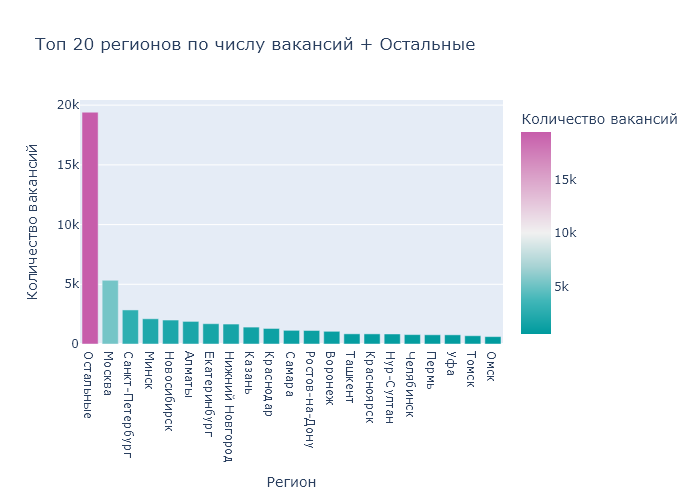

In [161]:
#сортировка по количеству вакансий
df_sorted = cnt_area.sort_values('cnt', ascending=False)

# Топ-20 регионов по количеству вакансий
top_20 = cnt_area.iloc[:20, 0]

# меняем столбец 'area', присваивая 'Остальные' всем регионам, которые не входят в топ-20
df_sorted['area'] = df_sorted['area'].apply(lambda x: x if x in top_20.values else 'Остальные')

# Суммируем количество вакансий для группы "Остальные"
df_grouped = df_sorted.groupby('area', as_index=False)['cnt'].sum()

df_grouped = df_grouped.sort_values('cnt', ascending=False)

# Строим график
fig = px.bar(df_grouped,
             x='area',
             y='cnt',
             title='Топ 20 регионов по числу вакансий + Остальные',
             labels={'cnt': 'Количество вакансий', 'area': 'Регион'},
             color='cnt',  # Цветовая шкала по количеству вакансий
             color_continuous_scale='tropic')


#fig.show()
fig.show('png')

***
Построим круговую диаграмму, показывающую долю вакансий с хотя бы одним заполненным полем ЗП:

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\1506396350.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



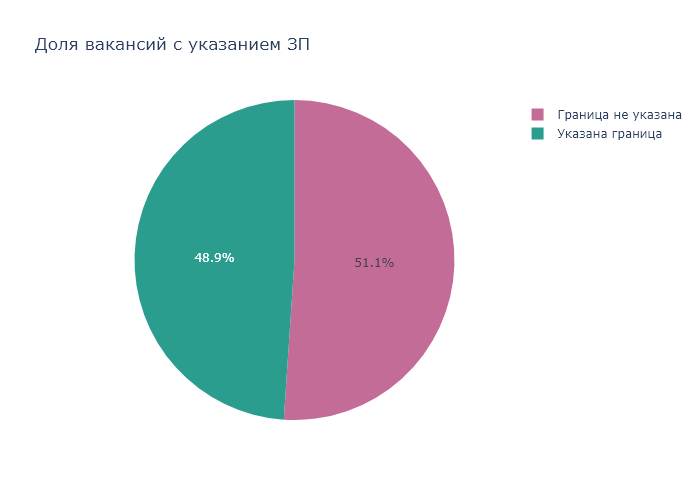

In [162]:
# запрос к БД 
query_4_2_2 = f'''
    SELECT 
        COUNT(*) count, 'Указана граница' salary_boundary
    FROM vacancies
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL -- фильтруем вакансии, где хотя бы одна из границ ЗП не нулевая
    UNION ALL
    SELECT 
        COUNT(*), 'Граница не указана'
    FROM vacancies
    WHERE salary_from IS NULL AND salary_to IS NULL -- вакансии с не указанными границами ЗП
'''

df = pd.read_sql_query(query_4_2_2, connection)

# Построение круговой диаграммы

fig = px.pie(
    df,
    names='salary_boundary',  # Названия категорий
    values='count',           # Значения
    title='Доля вакансий с указанием ЗП',
    color_discrete_sequence=['#C46C98', '#2A9D8F']  # Цвета
)

#fig.show()
fig.show('png')


***
Построим график распределения предлагаемой ЗП:

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\336890956.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Нижняя граница,Верхняя граница
0,64000.0,NaN
1,15000.0,NaN
2,40000.0,60000.0
3,50000.0,NaN
4,150000.0,NaN
...,...,...
24068,50000.0,NaN
24069,102500.0,NaN
24070,40000.0,78000.0
24071,60000.0,NaN


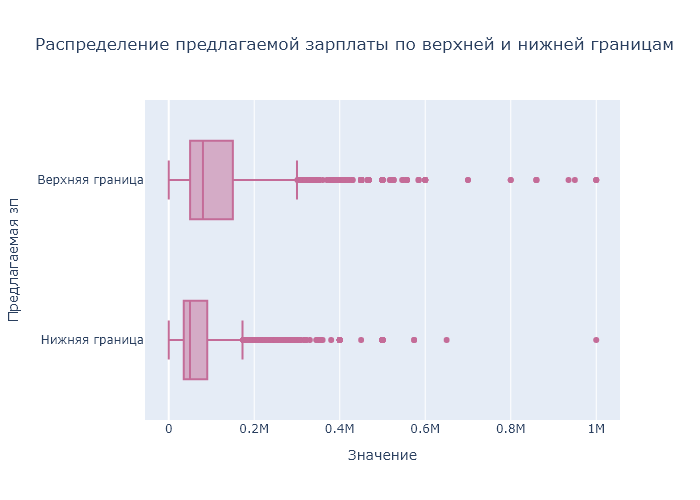

In [163]:
# запрос, выводящий указаные нижние и верхние границы предлагаемой заработной платы
query_4_3_2 = '''
    SELECT
        v.salary_from "Нижняя граница",
        v.salary_to "Верхняя граница"
    FROM vacancies v
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL -- фильтруются вакансии, где не нулевая хотя бы одна из границ
'''

df_salary = pd.read_sql_query(query_4_3_2, connection)
display(df_salary)

# построение коробчатой диаграммы

fig = px.box(
    df_salary, 
    x=["Нижняя граница", "Верхняя граница"], 
    title="Распределение предлагаемой зарплаты по верхней и нижней границам",
    labels={'variable': 'Предлагаемая зп', 'value': 'Значение'},
    color_discrete_sequence=['#C46C98'])

#fig.show()
fig.show('png')


***
Построим график распределения количество вакансий в зависимости от типа трудоустройства и графика работы:

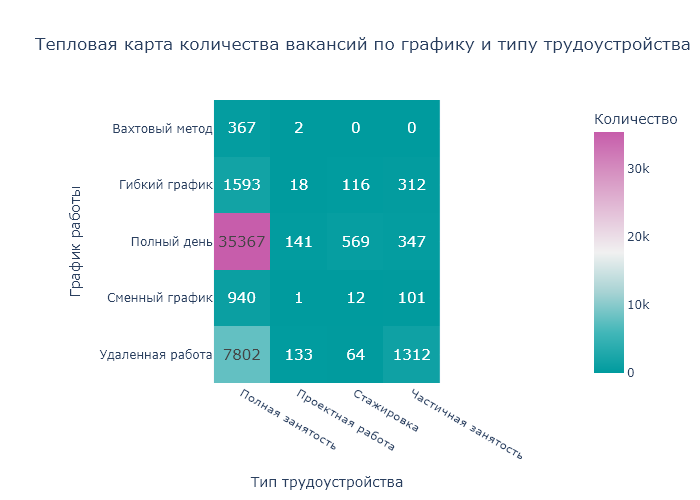

In [164]:
# сводная таблица 
pivot_tbl = cnt_schedule_empl.pivot_table(
    index='schedule',
    columns='employment',
    values='count',
    fill_value=0
)

# тепловая карта зависимости количества вакансий от типа трудоустройства и графика работы
fig = px.imshow(
    pivot_tbl, 
    color_continuous_scale="tropic", 
    labels={"x": "Тип трудоустройства", "y": "График работы", "color": "Количество"},
    title="Тепловая карта количества вакансий по графику и типу трудоустройства")

# Добавление аннотаций на клетки
fig.update_traces(
    text=pivot_tbl.values, 
    texttemplate="%{text}", 
    textfont_size=15, 
    colorbar_tickvals=[0, 5, 10, 15], 
    colorbar_ticktext=["0", "5", "10", "15"]
)

#fig.show()
fig.show('png')


***
Построим график распределения количества вакансий в зависимости от требуемого опыта

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\3753463655.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



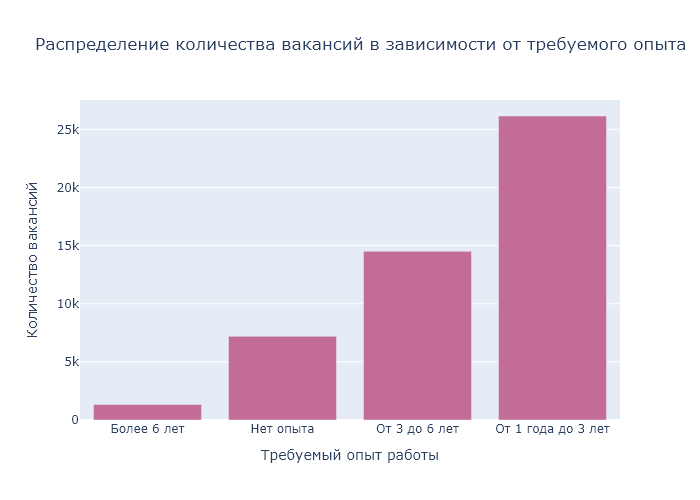

In [165]:
# запрос, выводящий значения требуемого опыта работы и количество вакансий
query_4_5_2= '''
    SELECT
        experience, --требуемый опыт
        COUNT(*)
    FROM vacancies v
    GROUP BY 1
    ORDER BY count(id)
'''

# Результат запроса
experience_cnt = pd.read_sql_query(query_4_5_2, connection)

# столбчатая диаграмма
fig = px.bar(
    experience_cnt,
    x='experience',
    y='count',
    title='Распределение количества вакансий в зависимости от требуемого опыта',
    labels={"experience": "Требуемый опыт работы", "count": "Количество вакансий"},
    color_discrete_sequence=['#C46C98']
)

#fig.show()
fig.show('png')

***

Выводы по детальному анализу вакансий

Проанализировав данные о доступных вакансиях можно сделать следующие выводы:

1. Лидерами по количеству вакансий являются Москва(5333) и Санкт-Петербург(2851)

2. 60% вакансий(29787) размещены в 20 регионах, 40% (19410) во всех остальных регионах. Такая статистика свидетельствует о неравномерном распределении вакансий по регионам

Это показывает дисбаланс в экономическом развитии и распределении рабочих мест между регионами и может быть сигналом для работодателей, государства и инвесторов о том, что стоит уделять больше внимания поддержке менее активных регионов, чтобы выравнивать экономические и социальные условия.

3. Чуть больше, чем у половины вакансий(51,1%) не указана граница заработной платы. Отсутствие указания границ заработной платы в большинстве вакансий свидетельствует о недостаточной прозрачности и зрелости рынка труда. Это может создавать неудобства для соискателей, которым важна предсказуемость условий работы, и затруднять сравнение предложений между работодателями.

4. В большинстве вакансий, где указана зарплата, средний диапазон зарплат находится в интервале от 60 тыс. до 150 тыс. руб. по верхней границе и от 35 тыс. до 90 тыс. руб. по нижней. Средние значения по этим границам составляют соответственно 80 тыс. руб. и 50 тыс. руб. Это показывает, что большая часть вакансий ориентирована на зарплаты в пределах среднерыночных значений, что отражает общие условия рынка труда.

При этом наблюдаются значительные аномалии с высокими значениями, где верхняя граница зарплаты превышает 300 тыс. руб., а в некоторых случаях достигает 1 млн. руб. Аналогично, нижняя граница в некоторых вакансиях также может достигать 1 млн. руб., что требует дополнительного анализа и объяснения. Такие аномалии могут свидетельствовать о редких, высококвалифицированных или руководящих позициях, которые имеют значительно более высокий уровень компенсации.

5. - Основная форма трудоустройства - полная занятость и полный рабочий день(35367 вакансий).
   - Удаленная работа активно используется как для полной занятости (7802 вакансии), так и для частичной (1312 вакансий), что подтверждает адаптацию рынка труда к новым реалиям.
   - Гибкий график востребован для полной(1593) и частичной(312) занятости и стажировок(116).
   - Проектная работа и стажировки занимают значительно меньшую долю рынка, что может отражать специфику экономики и предпочтения компаний в плане долгосрочного сотрудничества.
   - Сменный график и вахтовый метод остаются узкоспециализированными и востребованы только в отдельных отраслях.

6.  - 42,7% вакансий предлагают соискателям с опытом работы от 1 года до 3 лет(26152 вакансии), что свидетельствует о том, что работодатели предпочитают специалистов с базовым опытом, которых можно быстро адаптировать к работе, 

    - 23,7 % вакансий(14511) с опытом работы от 3 до 6 лет, это вакансии для специалистов среднего уровня, способных решать более сложные задачи, руководить небольшими проектами или командами. Указывает на высокий спрос на квалифицированных профессионалов, особенно в технических и управленческих областях.

    - 11,7%(7197) вакансий без опыта, вероятно, связаны со стажировками, работой начального уровня (junior) или рутинными задачами, не требующими специфических навыков. Подчеркивает стремление работодателей привлекать молодых специалистов и развивать их в компании.
    
    - 2,2%(1337) вакансий с опытом более 6 лет. Такие вакансии чаще всего редки из-за высокой стоимости сотрудников с большим опытом и специфики таких ролей.

***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [166]:
# текст запроса
query_5_1 = '''
    SELECT
        e.name
    FROM employers as e
    JOIN vacancies as v ON e.id = v.employer_id
    GROUP BY 1
    ORDER BY count(v.id) DESC
    LIMIT 5
'''

In [167]:
# результат запроса
name_employers= pd.read_sql_query(query_5_1, connection)
name_employers

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\2805327350.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name
0,Яндекс
1,Ростелеком
2,Тинькофф
3,СБЕР
4,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [168]:
# текст запроса
query_5_2 = '''
    SELECT
        a.name area, -- название региона
        COUNT(DISTINCT e.id) employers, -- количество уникальных работодателей
        COUNT(DISTINCT v.id) vacancies -- количество уникальных вакансий
    FROM areas a
    LEFT JOIN vacancies v ON a.id = v.area_id -- Левое соединение с таблицей вакансий
    LEFT JOIN employers e ON a.id = e.area  --Левое соединение с таблицей работодателей
    WHERE v.area_id IS NULL -- только регионы в которых нет вакансий
    GROUP BY 1
    ORDER BY 2 DESC 
'''

In [169]:
# результат запроса
area_company_vacation= pd.read_sql_query(query_5_2, connection)
area_company_vacation

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\3223853171.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,employers,vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [170]:
# текст запроса
query_5_3 = '''
    SELECT
        e.name company, -- название работодателя
        COUNT(DISTINCT v.area_id) cnt_areas -- количество уникальных регионов
    FROM employers e
    JOIN vacancies v ON e.id = v.employer_id
    GROUP BY 1
    ORDER BY 2 DESC
'''

In [171]:
# результат запроса
cnt_area= pd.read_sql_query(query_5_3, connection)
cnt_area

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\2865226826.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,company,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [172]:
# текст запроса
query_5_4 = '''
    SELECT
        COUNT(*) cnt_companies
    FROM employers e
    LEFT JOIN employers_industries ei ON e.id = ei.employer_id
    WHERE ei.industry_id IS NULL
'''

In [173]:
# результат запроса
industry_is_null = pd.read_sql_query(query_5_4, connection)
industry_is_null

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\935181353.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,cnt_companies
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [174]:
# текст запроса
query_5_5 = '''
    SELECT
        e.name
    FROM employers e
    JOIN employers_industries ei ON e.id = ei.employer_id
    GROUP BY 1
    HAVING COUNT(ei.industry_id) = 4 --фильтр работодателей с 4 сферами деятельнсти
    ORDER BY 1
    OFFSET 2  -- пропустить 2 первые строки
    LIMIT 1 -- оставить только одну строку
'''

In [175]:
# результат запроса
e_name = pd.read_sql_query(query_5_5, connection)
e_name

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\4092212400.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [176]:
# текст запроса
query_5_6 = f'''
    SELECT
        COUNT(DISTINCT ei.employer_id) cnt 
    FROM employers_industries ei
    JOIN industries i ON ei.industry_id = i.id
    WHERE i.name = 'Разработка программного обеспечения' --фильтрация по названию сферы деятельности

'''

In [177]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\821628714.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 
 

In [178]:
# код для получения списка городов-милионников

# URL страницы
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"

# Загрузка страницы
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Поиск таблицы с городами
table = soup.find("table", {"class": "standard"})

# Сбор данных о городах
cities = []
rows = table.find_all("tr")[1:]  # Пропускаем заголовок таблицы
for row in rows:
    cols = row.find_all("td")
    if cols:
        city = cols[1].get_text(strip=True)  # Название города
        cities.append(city)
million_cities = tuple(cities)

# Вывод списка городов
print("Города-миллионники России:")
for city in cities:
    print(city)

Города-миллионники России:
Москва
Санкт-Петербург
Новосибирск
Екатеринбург
Казань
Красноярск
Нижний Новгород
Челябинск
Уфа
Самара
Ростов-на-Дону
Краснодар
Омск
Воронеж
Пермь
Волгоград


In [179]:
# текст запроса
query_5_7 = f'''
    WITH Region_vacancies AS ( -- создаем временную таблицу, содержащую количество вакансий для каждой области, где работает 'Яндекс'
        SELECT
            a.name, -- название региона
            COUNT(v.id)::int cnt -- количество вакансий
        FROM vacancies v
        JOIN areas a ON a.id = v.area_id
        JOIN employers e ON e.id = v.employer_id
        WHERE e.name = 'Яндекс'  -- фильтрация по названию компании и вхождения региона в список городов-миллионников
            AND a.name IN {million_cities}
        GROUP BY a.name
        ORDER BY 2 DESC
    ),
    Total_cnt AS ( -- временная таблица для подсчета общего количества вакансий Яндекса в городах-миллионниках
        SELECT
            'total',
            sum(cnt)::int cnt
        FROM Region_vacancies
    )
    SELECT * -- берем все строки из Region_vacancies и соединяем с total из Total_cnt
    FROM Region_vacancies
    UNION ALL
    SELECT *
    FROM Total_cnt
        
'''

In [180]:
# результат запроса
ya_vacation_million_city = pd.read_sql_query(query_5_7, connection)
ya_vacation_million_city

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\3176448752.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,cnt
0,Москва,54
1,Санкт-Петербург,42
2,Екатеринбург,39
3,Нижний Новгород,36
4,Новосибирск,35
5,Воронеж,32
6,Краснодар,30
7,Самара,26
8,Уфа,26
9,Казань,25


***

Дополнительно визуализируем данные по анализу работодателей

***

Построим диаграмму ТОП-10 работодателей по количеству вакансий

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\3900120506.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



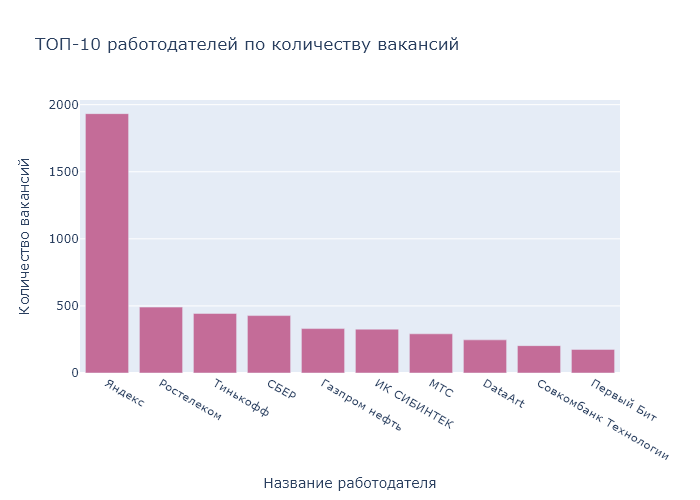

In [181]:
# Запрос, выводящий топ 10 работодателей по количеству вакансий
query_5_1_2 = '''
    SELECT
        e.name "Название работодателя",
        count(v.id) "Количество вакансий"
    FROM employers e
    JOIN vacancies v ON e.id = v.employer_id
    GROUP BY 1
    ORDER BY count(v.id) DESC
    LIMIT 10 
'''

# разельтат запроса
df_top_10 = pd.read_sql_query(query_5_1_2, connection)
# display(df_top_10)

# столбчатая диаграмма топ 10 работодателей
fig = px.bar(
    df_top_10,
    x='Название работодателя',
    y='Количество вакансий',
    title='ТОП-10 работодателей по количеству вакансий',
    color_discrete_sequence=['#C46C98']
    )

#fig.show()
fig.show('png')


***

Построим график распределения количества работодателей и вакансий по регионам

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\123528707.py:23: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\123528707.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



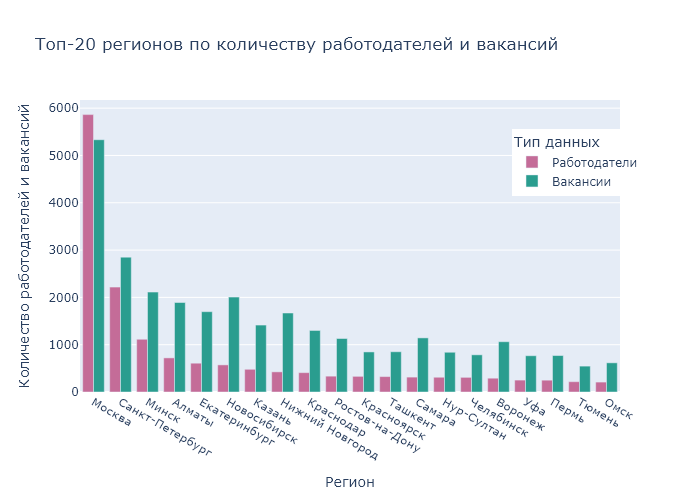

In [182]:
#запросы, показывающие количество работодателей и вакансий для каждого региона

query_5_2_2= '''
    SELECT
        a.name area,
        COUNT(DISTINCT e.id) employers
    FROM areas a
    JOIN employers e ON a.id = e.area
    GROUP BY 1
    ORDER BY 2 DESC
'''
query_5_2_3= '''
    SELECT
        a.name area,
        COUNT(distinct v.id) vacancies
    FROM areas a
    JOIN vacancies v ON a.id = v.area_id
    GROUP BY 1
    ORDER BY 2 DESC
'''

# результаты запросов
df_5_2_2 = pd.read_sql_query(query_5_2_2, connection)
df_5_2_3 = pd.read_sql_query(query_5_2_3, connection)

# Объединяем два DataFrame по регионам
result = pd.merge(df_5_2_2, df_5_2_3, on='area', how='inner')

# Сортируем по количеству работодателей и вакансий
result = result.sort_values(['employers', 'vacancies'], ascending=False)

# Топ-20 регионов по количеству работодателей
top_20_employers = result.nlargest(20, 'employers')


# Строим график
fig = go.Figure()

# Столбчатая диаграмма для работодателей
fig.add_trace(go.Bar(
    x=top_20_employers['area'], 
    y=top_20_employers['employers'], 
    name='Работодатели',
    marker_color='#C46C98'
))

# Столбчатая диаграмма для вакансий (с использованием второй оси Y)
fig.add_trace(go.Bar(
    x=top_20_employers['area'], 
    y=top_20_employers['vacancies'], 
    name='Вакансии',
    marker_color='#2A9D8F'
))

# Настройки графика
fig.update_layout(
    barmode='group',  # Столбцы будут стоять рядом
    title='Топ-20 регионов по количеству работодателей и вакансий',
    xaxis_title="Регион",
    yaxis_title="Количество работодателей и вакансий",
    legend_title="Тип данных",
    legend=dict(x=0.8, y=0.9)
)

#fig.show()
fig.show('png')


***

Построим график ТОП-10 работодателей по количеству регионов, в которых они публикует свои вакансии

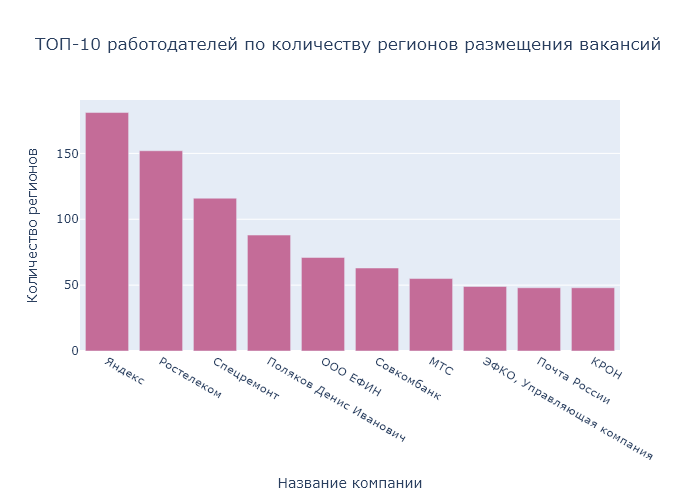

In [183]:
# Топ-10 работодателей по количеству регионов
top_10_area = cnt_area.nlargest(10, 'cnt_areas')

# Столбчатая диаграмма
fig = px.bar(
    top_10_area,
    x='company',
    y='cnt_areas',
    title='ТОП-10 работодателей по количеству регионов размещения вакансий',
    labels={'company': 'Название компании', 'cnt_areas': 'Количество регионов'},
    color_discrete_sequence=['#C46C98']
)

#fig.show()
fig.show('png')

***

Построим диаграмму распределения работодателей по количеству сфер деятельности

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\2906769427.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



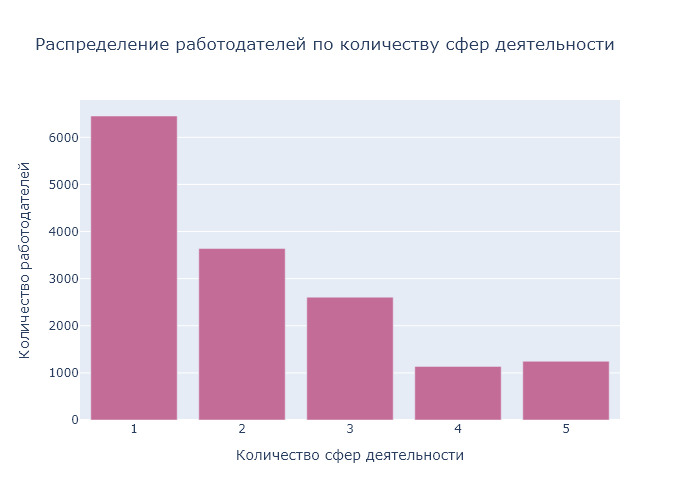

In [184]:
# Запрос, показывающий количество работодателей распределенных по количеству сфер деятельности
query_5_5_2 = '''
    SELECT --группирует количество работодателей по количеству сфер деятельности
        cnt_industries,
        COUNT(employer_id) cnt_employers
    FROM (
        SELECT -- подзапрос подсчитывает количество сфер деятельности (cnt_industries) для каждого работодателя (employer_id)
            e.id employer_id,
            COUNT(ei.industry_id) cnt_industries
        FROM employers e
        JOIN employers_industries ei ON e.id = ei.employer_id
        GROUP BY e.id
    ) subquery
    GROUP BY cnt_industries
    ORDER BY cnt_industries
'''

df = pd.read_sql_query(query_5_5_2, connection)
# display(df)

# Столбчатая диаграмма
fig = px.bar(
    df,
    x='cnt_industries',
    y='cnt_employers',
    title='Распределение работодателей по количеству сфер деятельности',
    labels={'cnt_industries': 'Количество сфер деятельности', 'cnt_employers': 'Количество работодателей'},
    color_discrete_sequence=['#C46C98']
)

#fig.show()
fig.show('png')


***

Построим диаграмму распределения работодателей по 10 топ сферам деятельности



C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\3946333044.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



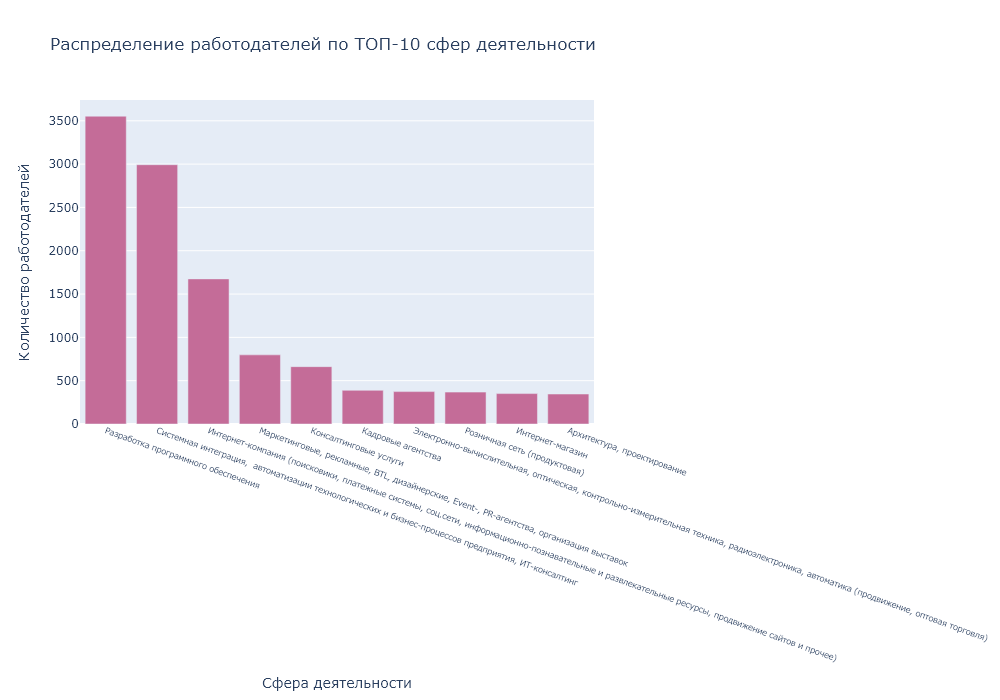

In [185]:
# Запрос, показывающий сколько работодателей указано в каждой сфере деятельности
query_5_6_2 = '''
    SELECT
        i.name "Сфера деятельности",
        COUNT(DISTINCT e.id) "Количество работодателей"
    FROM employers_industries ei
    JOIN employers e ON ei.employer_id = e.id
    JOIN industries i ON ei.industry_id = i.id
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
'''

# Результат запроса
df = pd.read_sql_query(query_5_6_2, connection)
# display(df)

# Столбчатая диаграмма
fig = px.bar(
    df,
    x='Сфера деятельности',
    y='Количество работодателей',
    title='Распределение работодателей по ТОП-10 сфер деятельности',
    color_discrete_sequence=['#C46C98'],
    
)
# настройка графика
fig.update_layout(
    xaxis_tickangle=20,
    xaxis=dict(
        tickfont=dict(size=8)
    )
)

#fig.show()
fig.show(renderer='png', width=1000, height=700)

***

Проанализировав данные о работодателях можно сделать следующие выводы:

1. ТОП 10 работодателей по количеству вакансий: 
   - Доминирующая позиция в списке работодателей с большим отрывом от остальных - Яндекс(1933 вакансии). Указывает на активное развитие компании, вероятно, в IT, аналитике, маркетинге и разработке. Подчеркивает значительный спрос на специалистов в сфере технологий и цифровых решений.
   - Ростелеком(491), как крупная телекоммуникационная компания, вероятно, ищет сотрудников в области IT, технической поддержки, продаж и администрирования.
   - Тинькофф(444): банк с сильной IT-ориентацией, активно нанимает специалистов в сфере разработки, клиентского сервиса и аналитики.
   - СБЕР (428 вакансий): вероятно, вакансии связаны с финансовыми услугами, IT, аналитикой и операционной деятельностью.
   - Газпром нефть(331): вакансии, вероятно, охватывают технические, инженерные и управленческие роли, а также цифровизацию и автоматизацию.
   - ИК СИБИНТЕК(327): IT-компания, входящая в состав группы "Газпром".
   - МТС(292): Активный найм, вероятно, связан с цифровыми сервисами, технической поддержкой и клиентским обслуживанием.
   - DataArt(247): международная IT-компания, ориентированная на разработку программного обеспечения.
   - Совкомбанк Технологии (204 вакансии): IT-подразделение Совкомбанка.
   - Первый Бит(176): Компания, предоставляющая IT-решения для бизнеса.

   Из этих данных видно, что большинство компаний в списке активно развивают IT-направление, что отражает цифровизацию экономики.

2.  Лидеры по количеству вакансий:

   - Москва (5333 вакансии, 5864 работодателей). Конкуренция среди работодателей здесь выше, чем в других регионах. Указывает на развитую экономику столицы и высокую потребность в кадрах.
   - Санкт-Петербург (2851 вакансий, 2217 работодателей). Вакансий больше, чем работодателей, что может говорить о мультивакансийности компаний.
   - Новосибирск (2006 вакансий, 573 работодателей). Третий по числу вакансий, несмотря на меньшее количество работодателей. Указывает на высокую среднюю потребность в кадрах на одного работодателя.

3. Лидеры по числу регионов присутствия:

   - Яндекс(181) - отражает масштаб деятельности компании и её фокус на цифровых сервисах, которые легко масштабируются и востребованы по всей стране.
   - Ростелеком(152) - широкое присутствие обусловлено масштабом компании как национального оператора связи.
   - Спецремонт(116) - может быть связано с необходимостью работы на местах, близко к клиентам.

4. Большинство компаний(6452) работают в одной отрасли, скорее всего, обладают высокой специализацией и фокусируются на конкретной области деятельности. Значительное количество компаний(3639) работает в двух отраслях, что может указывать на их стремление к диверсификации и расширению спектра предоставляемых услуг. Количество компаний, работающих в 3х отраслях достигает 2607. 4 отрасли имеют 11138 работодателей, в 5 и более отраслях работает минимальное число работодателей - 1246.

5.  Компании, занимающиеся разработкой програмного обеспечения(3553), системной интеграции(2993) и интернет-компании(1675) занимают лидирующие позиции, что отражает тренды цифровой трансформации и развитие технологий.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [186]:
# текст запроса
query_6_1 = f'''
    SELECT
        COUNT(v.id)
    FROM vacancies v
    WHERE v.name ILIKE '%data%'  -- фильтрация по наличию слов в названии
        OR v.name ILIKE '%данн%'
'''

In [187]:
# результат запроса
data_vacation = pd.read_sql_query(query_6_1, connection)
data_vacation

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\3560139186.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [188]:
# текст запроса
query_6_2 = f'''
    SELECT
        COUNT(v.name)
    FROM vacancies v
    WHERE  -- выбираем только вакансии по DS для начинающих специалистов
    (
        (v.name ILIKE '%data scientist%') OR (v.name ILIKE '%data science%') OR (v.name ILIKE '%исследователь данных%')
        OR ((v.name ILIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
        OR (v.name ILIKE '%machine learning%')
        OR (v.name ILIKE '%машинн%обучен%')
        AND (v.key_skills IS NOT NULL)
    )
        AND (v.name ILIKE '%junior%' 
            OR v.experience ILIKE '%Нет опыта%'
            OR v.employment ILIKE '%Стажировка%')
'''
        

In [189]:
# результат запроса
cnt_junior = pd.read_sql_query(query_6_2, connection)
cnt_junior

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\1920038825.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [190]:
# текст запроса
query_6_3 = f'''
    SELECT
        COUNT(v.name)
    FROM vacancies v
    WHERE  -- только вакансии по DS у которых указаны ключи SQL или postgres
    (
        (v.name ILIKE '%data scientist%') OR (v.name ILIKE '%data science%') OR (v.name ILIKE '%исследователь данных%')
        OR ((v.name ILIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
        OR (v.name ILIKE '%machine learning%')
        OR (v.name ILIKE '%машинн%обучен%')
        AND (v.key_skills IS NOT NULL)
    )
        AND (v.key_skills ILIKE '%SQL%' 
        OR v.key_skills ILIKE '% postgres%')
'''

In [191]:
# результат запроса
cnt_ds_sql= pd.read_sql_query(query_6_3, connection)
cnt_ds_sql

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\3182662630.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [192]:
# текст запроса
query_6_4 = f'''
    SELECT
        COUNT(v.name)
    FROM vacancies v
    WHERE 
    (
        (v.name ILIKE '%data scientist%') OR (v.name ILIKE '%data science%') OR (v.name ILIKE '%исследователь данных%')
        OR ((v.name ILIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
        OR (v.name ILIKE '%machine learning%')
        OR (v.name ILIKE '%машинн%обучен%')
        AND (v.key_skills IS NOT NULL)
    )
        AND (v.key_skills ILIKE '%python%')
'''

In [193]:
# результат запроса
cnt_ds_sql= pd.read_sql_query(query_6_4, connection)
cnt_ds_sql

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\3791371388.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [194]:
# текст запроса
query_6_5 = f'''
    SELECT
        ROUND(AVG(LENGTH(v.key_skills) - LENGTH(REPLACE(v.key_skills, CHR(9),''))+1),2)
    FROM 
        vacancies v
    WHERE 
        (
            (v.name ILIKE '%data scientist%')
            OR (v.name ILIKE '%data science%')
            OR (v.name ILIKE '%исследователь данных%')
            OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
            OR (v.name ILIKE '%machine learning%')
            OR (v.name ILIKE '%машинн%обучен%')
            AND (v.key_skills IS NOT NULL)
        )
'''

In [195]:
# результат запроса
cnt_skills= pd.read_sql_query(query_6_5, connection)
cnt_skills

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\588389752.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [196]:
# текст запроса
query_6_6 = f'''
    SELECT
        DISTINCT(v.experience),
        ROUND(AVG(COALESCE((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0) avg_salary
    FROM vacancies v
    WHERE
        (
            (v.name ILIKE '%data scientist%')
            OR (v.name ILIKE '%data science%')
            OR (v.name ILIKE '%исследователь данных%')
            OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
            OR (v.name ILIKE '%machine learning%')
            OR (v.name ILIKE '%машинн%обучен%')
            AND (v.key_skills IS NOT NULL)
        )
        AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
    GROUP BY 1
    ORDER BY 1
'''

In [197]:
# результат запроса
avg_salary = pd.read_sql_query(query_6_6, connection)
avg_salary

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\4147299713.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,145236.0
2,От 3 до 6 лет,243115.0


***

Дополнительно визуализируем данные по предметному анализу

Столбчатая диаграмма, показывающая общее количество вакансий, вакансии, относящиеся к данным и Data Science вакансии:

C:\Users\kinde\AppData\Local\Temp\ipykernel_10516\839135375.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



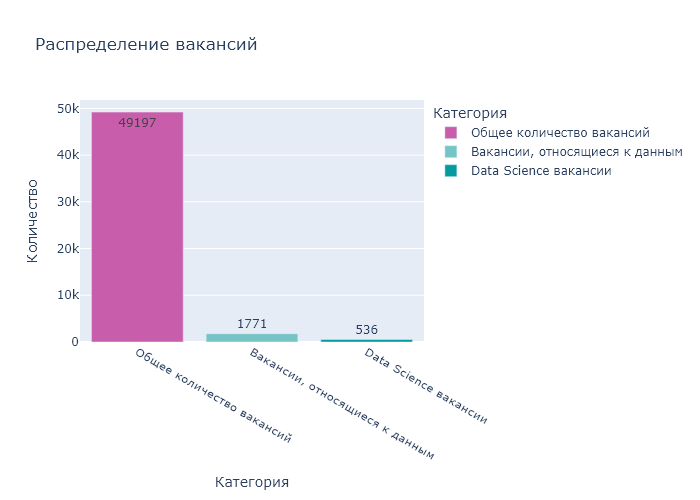

In [198]:
# Данные для визуализации
# запрос с количеством вакансий по DS
query_ds = f'''
    SELECT
        COUNT(v.name)
    FROM vacancies v
    WHERE 
    (
        (v.name ILIKE '%data scientist%') OR (v.name ILIKE '%data science%') OR (v.name ILIKE '%исследователь данных%')
        OR ((v.name ILIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
        OR (v.name ILIKE '%machine learning%')
        OR (v.name ILIKE '%машинн%обучен%')
     )
'''
vacancies_ds = pd.read_sql_query(query_ds, connection)
        
data = {
    'Категория': ['Общее количество вакансий', 'Вакансии, относящиеся к данным', 'Data Science вакансии'],
    'Количество': [
        count_vacancies.iloc[0, 0],  # Общее количество вакансий
        data_vacation.iloc[0, 0],   # Вакансии, относящиеся к данным
        vacancies_ds.iloc[0, 0]           # Data Science вакансии
    ]
}

df = pd.DataFrame(data)

# Построение графика
fig = px.bar(
    df,
    x='Категория',
    y='Количество',
    title='Распределение вакансий',
    text='Количество',  # Подписи для столбцов
    color='Категория',  # Раскрашивание столбцов для различия
    color_discrete_sequence=['#C75DAB', '#75C5C7', '#029C9F']
)

# Показать график
#fig.show()
fig.show('png')

***

Построим диаграмму, показывающую долю вакансий для junior Data Science

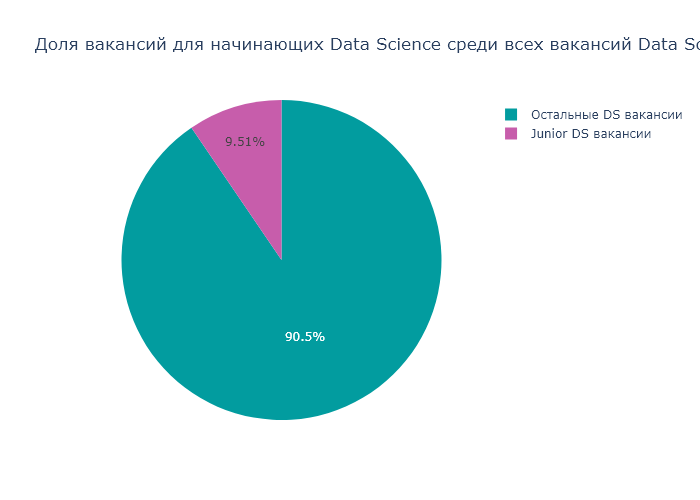

In [199]:
# Данные для диаграмы
df = pd.DataFrame({
    'category': ['Junior DS вакансии', 'Остальные DS вакансии'],
    'count': [51, 536 - 51]  # Подсчет остальных вакансий
})

# Построение круговой диаграммы
fig = px.pie(
    df,
    names='category',
    values='count',
    title='Доля вакансий для начинающих Data Science среди всех вакансий Data Science',
    color='category',
    color_discrete_sequence=['#C75DAB', '#029C9F']
)

#fig.show()
fig.show('png')


Диаграмма с долей вакансий DS с обязательным знанием SQL или postgres

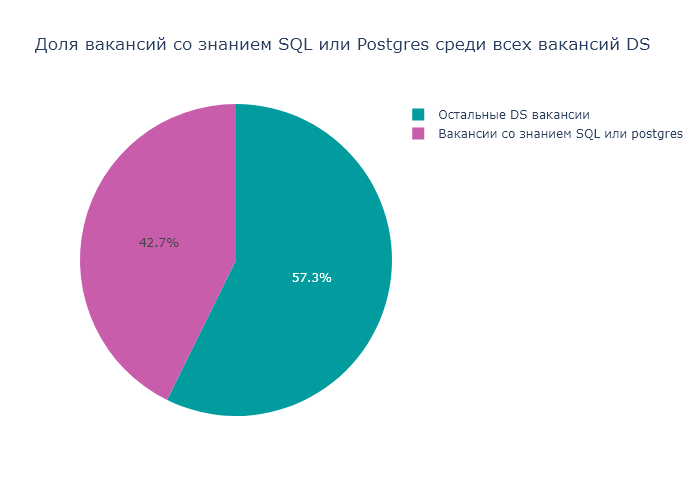

In [200]:
# Данные для диаграмы
df = pd.DataFrame({
    'category': ['Вакансии со знанием SQL или postgres', 'Остальные DS вакансии'],
    'count': [229, 536 - 229]  # Подсчет остальных вакансий
})

# Построение круговой диаграммы
fig = px.pie(
    df,
    names='category',
    values='count',
    title='Доля вакансий со знанием SQL или Postgres среди всех вакансий DS',
    color='category',
    color_discrete_sequence=['#C75DAB', '#029C9F']
)

#fig.show()
fig.show('png')


***

Диаграмма доли вакансий по DS со знанием Python

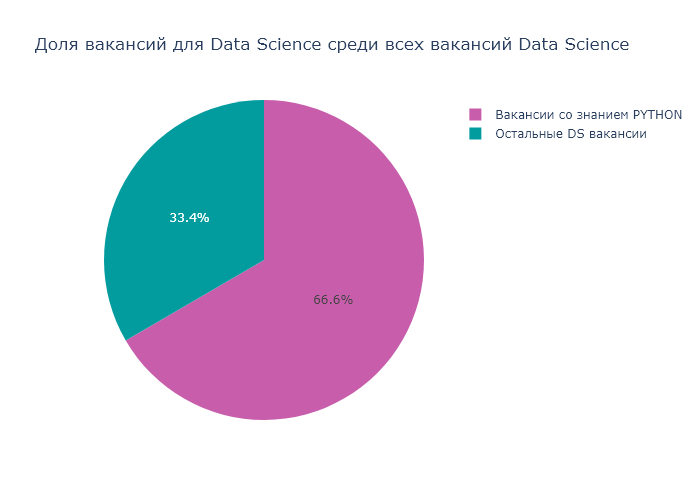

In [201]:
# Данные для диаграмы
df = pd.DataFrame({
    'category': ['Вакансии со знанием PYTHON', 'Остальные DS вакансии'],
    'count': [357, 536 - 357]  # Подсчет остальных вакансий
})

# Построение круговой диаграммы
fig = px.pie(
    df,
    names='category',
    values='count',
    title='Доля вакансий для Data Science среди всех вакансий Data Science',
    color='category',
    color_discrete_sequence=['#C75DAB', '#029C9F']
)

#fig.show()
fig.show('png')

***

График распределения средней ЗП для каждого типа требуемого опыта работы

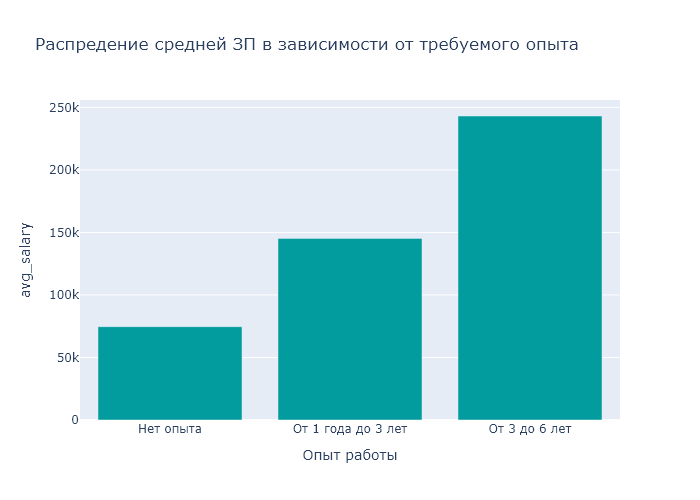

In [202]:
# Построение столбчатой диаграммы
fig = px.bar(
    avg_salary,
    x='experience',
    y='avg_salary',
    title='Распредение средней ЗП в зависимости от требуемого опыта',
    labels={'experience': 'Опыт работы', 'round': 'Средняя ЗП'},
    color_discrete_sequence=['#029C9F']
)

#fig.show()
fig.show('png')


По результатам анализа вакансий по DS можно сделать следующие выводы:

1. - Хотя Data Science – это перспективная область, её доля в общем числе вакансий сравнительно невелика (536 вакансий, 1.1%). Это может свидетельствовать о том, что работодатели все еще рассматривают её как нишевую и специализированную область, где требуется высокий уровень знаний и навыков.

   - Вакансии, относящиеся к данным, составляют около 3.6%(1771) от общего числа, что говорит о значении аналитических и связанных с данными профессий в экономике.

2. Очень небольшое количество вакансий (51 вакансия, это 9.5% от всех вакансий в Data Science) предназначено для начинающих специалистов. Это может указывать на высокий уровень требований к кандидатам, которые должны иметь опыт и навыки для выполнения задач без значительной дополнительной подготовки.

3. Вакансий с обязательным знанием SQL или PostgreSQL представлено 229. Эти вакансии составляют около 42.6% от общего количества вакансий в области Data Science, что показывает высокий спрос на специалистов, умеющих эффективно работать с базами данных и извлечением данных.

4. Из всех вакансий по DS 357 вакансий требуют знание Python. Эти вакансии составляют около 66.6% от общего числа вакансий в Data Science. 

5. - Для специалистов по Data Science без опыта работы средняя ЗП составляет 74643 руб. Несмотря на отсутствие опыта, зарплата показывает, что компании готовы платить за потенциал и обучение новых сотрудников.

   - Средняя зарплата для специалистов с опытом от 1 года до 3 лет составляет 145236 руб. Это более чем в два раза выше, чем у начинающих специалистов, что отражает рост дохода с накоплением навыков и увеличением ответственности.

   - Специалисты с опытом от 3 до 6 лет получают в среднем 243115 руб. Эта категория имеет наиболее высокую зарплату.

# Общий вывод по проекту



1. Общие выводы:

- Высокий спрос на рабочую силу: Общее количество вакансий (49,197) указывает на востребованность специалистов в различных областях. Однако, это также может свидетельствовать о нехватке профессионалов с необходимыми навыками, что приводит к высококонкурентной среде среди работодателей, готовых предлагать более привлекательные условия работы.

- Разнообразие работодателей и сфер: Большое количество работодателей (23,501) и широкое количество сфер деятельности (294) подтверждают диверсификацию рынка труда и возможность выбора для соискателей.

- Неравномерное распределение по регионам: 60% вакансий сосредоточены в 20 регионах, что указывает на дисбаланс в экономическом развитии и возможную необходимость привлечения инвестиций в менее активные регионы.

2. Особенности вакансий и условий труда:
- Недостаток прозрачности по зарплатам: Более половины вакансий (51,1%) не указывают границы заработной платы, что затрудняет принятие решений соискателями и снижает прозрачность рынка.

- Уровень зарплат: В большинстве вакансий средняя зарплата находится в диапазоне от 60 тыс. до 150 тыс. руб. по верхней границе и от 35 тыс. до 90 тыс. руб. по нижней, что соответствует среднерыночным условиям. Однако наблюдаются аномалии с высокими значениями, где зарплата превышает 300 тыс. руб., что может указывать на редкие или высококвалифицированные позиции.
    
- Типы занятости: Полная занятость и полный рабочий день преобладают, но наблюдается рост интереса к удаленной работе и гибкому графику, что отражает адаптацию рынка к новым условиям.

3. Анализ по регионам и работодателям:

- Москва и Санкт-Петербург лидируют по количеству вакансий, что свидетельствует о развитой экономике и высоком спросе на рабочую силу в этих регионах.

- Лидеры среди работодателей: Яндекс, Ростелеком и Тинькофф доминируют по количеству вакансий, что подчеркивает активное развитие IT и цифровых решений.

- Масштаб деятельности компаний: Яндекс и Ростелеком активно развивают бизнес на всей территории России, что отражает потребность в кадрах и услуги, доступные в разных регионах.

4. Анализ Data Science вакансий:
- Сравнительно малая доля: Data Science вакансии составляют всего 1.1% от общего числа, что говорит о специализированности этой области и высоких требованиях к кандидатам.

- Основной спрос идет на специалистов, владеющих Python (66.6% вакансий) и SQL/PostgreSQL (42.6% вакансий), что отражает необходимость работы с данными и аналитическими инструментами.

- Средние зарплаты по опыту:

    - Начинающие специалисты — 74643 руб.
    - Специалисты с опытом от 1 года до 3 лет — 145236 руб.
    - Специалисты с опытом от 3 до 6 лет — 243115 руб.

5. Рекомендации для дальнейших исследований:

- Изучение региональных различий: Провести дополнительный анализ, чтобы выяснить, какие меры могут способствовать привлечению больше вакансий и специалистов в менее развитые регионы.

- Анализ прозрачности зарплат: Оценить влияние отсутствия границ зарплаты на привлекательность вакансий и возможные меры по улучшению прозрачности.

- Детальный анализ по отраслям: Провести более глубокий анализ вакансий по ключевым отраслям, чтобы выявить, где больше всего востребованы специалисты и где ожидаются изменения в будущем.

Заключение

Данные о рынке вакансий и труда подтверждают наличие высокой конкуренции среди работодателей, большой востребованности специалистов с опытом и квалификацией, а также актуальные тенденции, такие как удаленная работа и гибкий график. Прозрачность условий труда и зарплат остается важной задачей для улучшения качества рынка и повышения его эффективности.






